In [103]:
%reload_ext autoreload
%autoreload 2
# %matplotlib widget
# %matplotlib notebook
%matplotlib inline


In [112]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import os
import georasters as gr

from geo_scripts.process_height import *
from matplotlib.colors import LinearSegmentedColormap

In [86]:
water = np.load("./data/underwater_mask.npy")
polity_map = np.load("./outputs/polity_map_-1400.npy")
size_map = np.load("./outputs/size_map_-1400.npy")
ultra_map = np.load("./outputs/ultra_-1400.npy")
mil_map = np.load("./outputs/military_-1400.npy")
ultra_map = np.ma.array(ultra_map, mask=water)
mil_map = np.ma.array(mil_map, mask=water)
size_map = np.ma.array(size_map, mask=water)

In [93]:
water = np.load("./data/underwater_mask.npy")
polity_map = np.load("./outputs/polity_map_-1000.npy")
size_map = np.load("./outputs/size_map_-1000.npy")
ultra_map = np.load("./outputs/ultra_-1000.npy")
mil_map = np.load("./outputs/military_-1000.npy")
ultra_map = np.ma.array(ultra_map, mask=water)
mil_map = np.ma.array(mil_map, mask=water)
size_map = np.ma.array(size_map, mask=water)

In [77]:
water = np.load("./data/underwater_mask.npy")
polity_map = np.load("./outputs/polity_map_-500.npy")
size_map = np.load("./outputs/size_map_-500.npy")
ultra_map = np.load("./outputs/ultra_-500.npy")
mil_map = np.load("./outputs/military_-500.npy")
ultra_map = np.ma.array(ultra_map, mask=water)
mil_map = np.ma.array(mil_map, mask=water)
size_map = np.ma.array(size_map, mask=water)

In [36]:
water = np.load("./data/underwater_mask.npy")
polity_map = np.load("./outputs/polity_map_1000.npy")
size_map = np.load("./outputs/size_map_1000.npy")
ultra_map = np.load("./outputs/ultra_1000.npy")
mil_map = np.load("./outputs/military_1000.npy")
ultra_map = np.ma.array(ultra_map, mask=water)
mil_map = np.ma.array(mil_map, mask=water)
size_map = np.ma.array(size_map, mask=water)

In [80]:
water = np.load("./data/underwater_mask.npy")
polity_map = np.load("./outputs/polity_map_1500.npy")
size_map = np.load("./outputs/size_map_1500.npy")
ultra_map = np.load("./outputs/ultra_1500.npy")
mil_map = np.load("./outputs/military_1500.npy")
ultra_map = np.ma.array(ultra_map, mask=water)
mil_map = np.ma.array(mil_map, mask=water)
size_map = np.ma.array(size_map, mask=water)

In [89]:
water = np.load("./data/underwater_mask.npy")
polity_map = np.load("./outputs/polity_map_0.npy")
size_map = np.load("./outputs/size_map_0.npy")
ultra_map = np.load("./outputs/ultra_0.npy")
mil_map = np.load("./outputs/military_0.npy")
ultra_map = np.ma.array(ultra_map, mask=water)
mil_map = np.ma.array(mil_map, mask=water)
size_map = np.ma.array(size_map, mask=water)

In [151]:
num_polities = np.ma.max(polity_map) + 1
size_counts = np.zeros((num_polities,), dtype=np.int)
for x in np.nditer(polity_map):
    if x != -1:
        size_counts[x] += 1
np.max(size_counts)
# plt.imshow(ultra_map)

96

In [90]:
colors = [(0, .5, 0), (1, 1, 0), (1, 0, 0)]
cm = LinearSegmentedColormap.from_list(
        "turchin", colors, N=6)

<IPython.core.display.Javascript object>


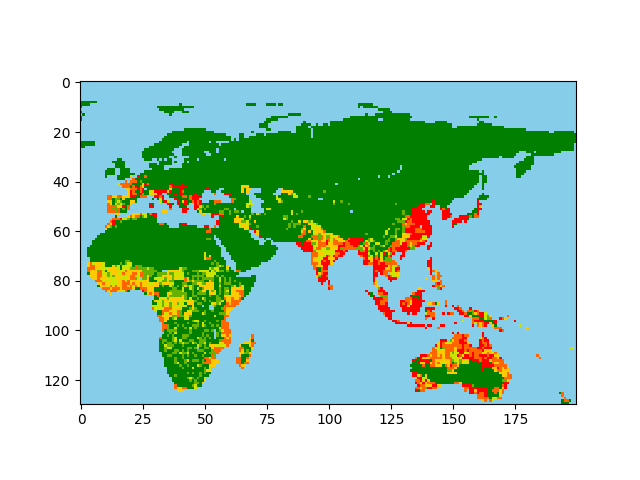

In [94]:
# [20:90, 160:330]
plt.imshow(mil_map, vmin=0, vmax=5, cmap=cm)

In [117]:
100000/100**2

10.0

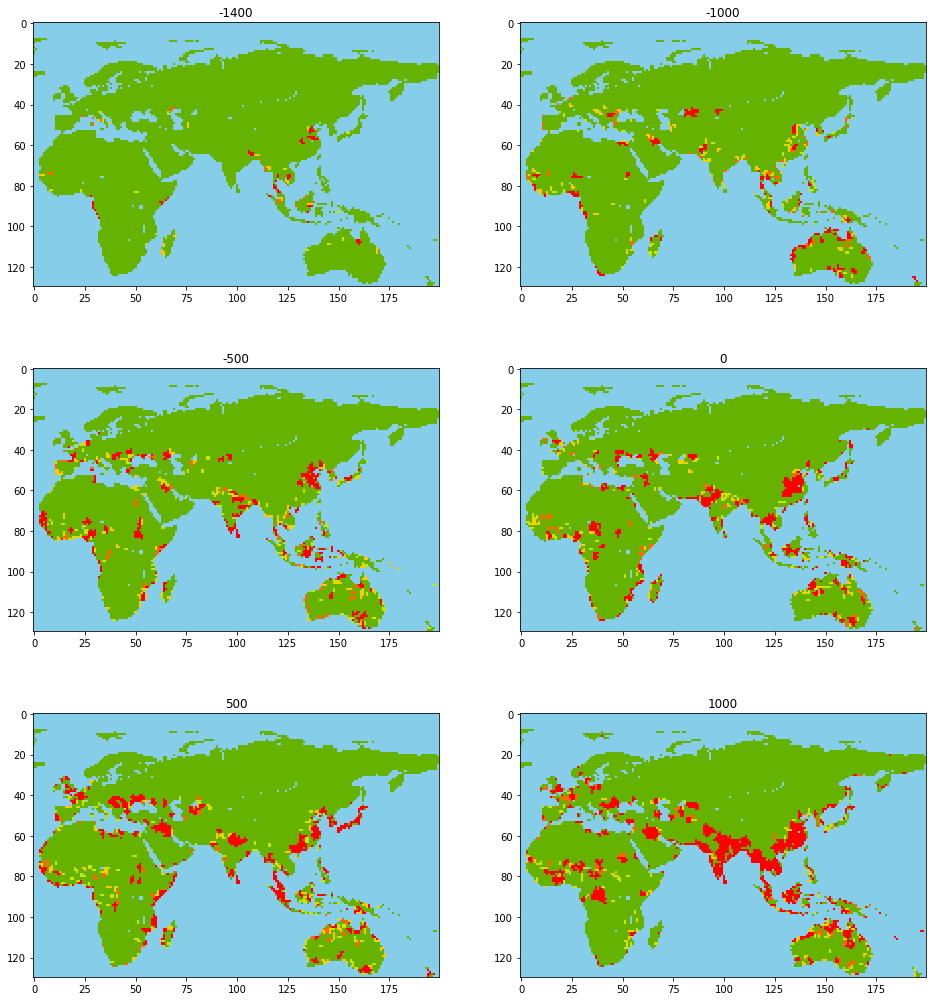

In [125]:
years = [-1400, -1000, -500, 0, 500, 1000]#, 1500]

water = np.load("./data/underwater_mask.npy")
water_color = (135, 206, 235)
water_image = np.zeros((*ultra_map.shape, 3))
water_image[:,:] = water_color

fig = plt.figure(figsize=(16,18))

for i, year in enumerate(years):
    i += 1
    ultra_map = np.load("./outputs/ultra_%s.npy" % (year,))
    size_map = np.load("./outputs/size_map_%s.npy" % (year,))

    ultra_map = np.ma.array(ultra_map, mask=water)
    size_map = np.ma.array(size_map, mask=water)
    ultra_map = ultra_map[:130, 160:]
    size_map = size_map[:130, 160:]
    sub = fig.add_subplot(3, 2, i)
    sub.imshow(water_image/256)
    sub.imshow(size_map, vmin=0, vmax=5, cmap=cm)
    sub.set_title(year)